# Features and labels in the dataset
* age - Age of patients
* sex - Sex of patients
* cp - Chest pain type
* trestbps - Resting blood pressure
* chol - Serum cholesterol
* fbs - Fasting blood sugar
* restecg - Resting electrographic results
* thalachh - Maximum heart rate achieved
* exng - Exercise induced angina
* oldpeak - ST depression induced by exercise relative to rest
* slp - Slope of the peak
* caa - Coronary Artery Anomalies
* thall - Defect type


## Importing required libraries

In [2]:
import numpy as np 
import pandas as pd 

import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [95]:
pd.options.display.float_format = '{:,.16f}'.format

## Data manipulation

### Read the data set

In [3]:
# read the data
data_path = '../data/data.csv'
df = pd.read_csv(data_path)
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Basic Data Checking

In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [8]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [9]:
corr_data = df.corr()
x = corr_data.columns
y = corr_data.index
values = np.array(corr_data)

In [10]:
fig = px.imshow(img=values, x=x, y=y, text_auto=True, aspect='auto')
fig.update_xaxes(side="top")
fig.show()

In [11]:
fig = px.line(df, y="age", color='output', title='Life expectancy in Canada')
fig.show()

In [12]:
output_count = df.groupby('output').agg(output_count = ('output', 'count')).reset_index()
output_count['output'] = output_count['output'].astype('string')
output_count

,output,output_count
0,0,138
1,1,165


In [13]:
fig = px.bar(output_count, x="output", y="output_count", title="Total distinct output")
fig.show()

In [14]:
age_count = df.groupby('age').agg(age_count = ('age', 'count')).reset_index()
age_count['age'] = age_count['age'].astype('string')
age_count.head()

,age,age_count
0,29,1
1,34,2
2,35,4
3,37,2
4,38,3


In [15]:
fig = px.bar(age_count, x="age", y="age_count", title="Total distinct age")
fig.show()

## Machine Learning Algorithm

In [16]:
x = df.drop('output', axis=1)
x.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [17]:
y = df['output']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

In [69]:
ml_algorithms = {}

### Logistic Regression

In [19]:
log_model = LogisticRegression(solver='lbfgs', max_iter=1000)

In [20]:
log_model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [21]:
# accuracy
log_model.score(x_train, y_train)

0.8636363636363636

In [22]:
# predict
predict_log_model = log_model.predict(x_test)
predict_log_model

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [23]:
cm_log_model = metrics.confusion_matrix(y_test, predict_log_model)
print(cm_log_model)

[[25  4]
 [ 3 29]]


In [24]:
fig = px.imshow(img=cm_log_model, text_auto=True)
fig.show()

In [25]:
tp,fn,fp,tn = cm_log_model.reshape(-1)
print(tp,fn,fp,tn)

25 4 3 29


In [26]:
# accuracy calculation
accuracy = (tp + tn) / (tp + tn + fp + fn)
accuracy

0.8852459016393442

In [27]:
precision = tp / (tp + fp)
precision

0.8928571428571429

In [28]:
sensitivity = tp / (tp + fn)
sensitivity

0.8620689655172413

In [29]:
Specificity = tn / (tn + fp)
Specificity

0.90625

In [30]:
f1_score = (precision + sensitivity) / 2
f1_score

0.8774630541871922

In [31]:
report_predict_log_model = classification_report(y_test, predict_log_model)
print(report_predict_log_model)

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [32]:
log_model_accuracy = accuracy_score(y_test, predict_log_model)
log_model_accuracy

0.8852459016393442

In [73]:
ml_algorithms['Logistic Regression'] = log_model_accuracy

### KNeighbors Classifier

In [33]:
kn_classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
kn_classifier.fit(x_train, y_train) 

KNeighborsClassifier()

In [34]:
predict_kn_classifier = kn_classifier.predict(x_test)

In [35]:
cm_kn_classifier = confusion_matrix(y_test, predict_kn_classifier)
cm_kn_classifier

array([[18, 11],
       [ 8, 24]], dtype=int64)

In [36]:
fig = px.imshow(img=cm_kn_classifier, text_auto=True)
fig.show()

In [37]:
report_predict_kn_classifier = classification_report(y_test, predict_kn_classifier)
print(report_predict_kn_classifier)

              precision    recall  f1-score   support

           0       0.69      0.62      0.65        29
           1       0.69      0.75      0.72        32

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61



In [38]:
kn_classifier_accuracy = accuracy_score(y_test, predict_kn_classifier)
kn_classifier_accuracy

0.6885245901639344

In [74]:
ml_algorithms['KNeighbors Classifier'] = kn_classifier_accuracy
print(ml_algorithms)

{'Logistic Regression': 0.8852459016393442, 'KNeighbors Classifier': 0.6885245901639344}


### Random Forest Classifier

In [39]:
rf_classifier = RandomForestClassifier(n_estimators= 10, criterion="entropy")
rf_classifier.fit(x_train, y_train) 

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [40]:
predict_rf_classifier = rf_classifier.predict(x_test)

In [42]:
cm_rf_classifier = confusion_matrix(y_test, predict_rf_classifier)
cm_rf_classifier

array([[25,  4],
       [ 6, 26]], dtype=int64)

In [43]:
fig = px.imshow(img=cm_rf_classifier, text_auto=True)
fig.show()

In [45]:
report_predict_rf_classifier = classification_report(y_test, predict_rf_classifier)
print(report_predict_rf_classifier)

              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [46]:
rf_classifier_accuracy = accuracy_score(y_test, predict_rf_classifier)
rf_classifier_accuracy

0.8360655737704918

In [75]:
ml_algorithms['Random Forest Classifier'] = rf_classifier_accuracy
print(ml_algorithms)

{'Logistic Regression': 0.8852459016393442, 'KNeighbors Classifier': 0.6885245901639344, 'Random Forest Classifier': 0.8360655737704918}


### Decision Tree Algorithm

In [47]:
dt_classifier = DecisionTreeClassifier()

In [48]:
dt_classifier.fit(x,y)

DecisionTreeClassifier()

[Text(0.5104166666666666, 0.9545454545454546, 'cp <= 0.5\ngini = 0.496\nsamples = 303\nvalue = [138, 165]'),
 Text(0.2638888888888889, 0.8636363636363636, 'caa <= 0.5\ngini = 0.397\nsamples = 143\nvalue = [104, 39]'),
 Text(0.16666666666666666, 0.7727272727272727, 'thall <= 2.5\ngini = 0.499\nsamples = 65\nvalue = [31, 34]'),
 Text(0.09259259259259259, 0.6818181818181818, 'exng <= 0.5\ngini = 0.361\nsamples = 38\nvalue = [9, 29]'),
 Text(0.037037037037037035, 0.5909090909090909, 'thalachh <= 96.5\ngini = 0.153\nsamples = 24\nvalue = [2, 22]'),
 Text(0.018518518518518517, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.05555555555555555, 0.5, 'chol <= 316.5\ngini = 0.083\nsamples = 23\nvalue = [1, 22]'),
 Text(0.037037037037037035, 0.4090909090909091, 'gini = 0.0\nsamples = 21\nvalue = [0, 21]'),
 Text(0.07407407407407407, 0.4090909090909091, 'chol <= 362.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.05555555555555555, 0.3181818181818182, 'gini = 0.0\nsamples = 1\nvalue

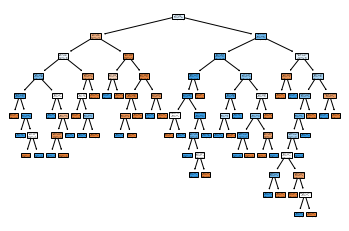

In [50]:
tree.plot_tree(dt_classifier,filled=True, feature_names=x.columns)

In [51]:
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [52]:
dt_classifier.score(x_train, y_train)

1.0

In [53]:
dt_classifier.score(x_test, y_test)

0.8360655737704918

In [54]:
predict_dt_classifier = dt_classifier.predict(x_test)
predict_dt_classifier

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [55]:
cm_dt_classifier = confusion_matrix(y_test, predict_dt_classifier)
cm_dt_classifier

array([[26,  3],
       [ 7, 25]], dtype=int64)

In [57]:
fig = px.imshow(img=cm_dt_classifier, text_auto=True)
fig.show()

In [58]:
report_predict_dt_classifier = classification_report(y_test, predict_dt_classifier)
print(report_predict_dt_classifier)

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [59]:
dt_classifier_accuracy = accuracy_score(y_test, predict_dt_classifier)
dt_classifier_accuracy

0.8360655737704918

In [76]:
ml_algorithms['Decision Tree'] = dt_classifier_accuracy
print(ml_algorithms)

{'Logistic Regression': 0.8852459016393442, 'KNeighbors Classifier': 0.6885245901639344, 'Random Forest Classifier': 0.8360655737704918, 'Decision Tree': 0.8360655737704918}


### Support Vector Machine

In [60]:
svm = SVC(kernel='linear')

In [61]:
svm.fit(x_train, y_train)

SVC(kernel='linear')

In [62]:
svm.score(x_test, y_test)

0.8688524590163934

In [63]:
predict_svm = svm.predict(x_test)  
predict_svm

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [64]:
cm_svm = confusion_matrix(y_test, predict_svm)
cm_svm

array([[25,  4],
       [ 4, 28]], dtype=int64)

In [65]:
fig = px.imshow(img=cm_svm, text_auto=True)
fig.show()

In [67]:
report_predict_svm = classification_report(y_test, predict_svm)
print(report_predict_svm)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [68]:
svm_accuracy = accuracy_score(y_test, predict_svm)
svm_accuracy

0.8688524590163934

In [77]:
ml_algorithms['Support Vector Machine'] = svm_accuracy
print(ml_algorithms)

{'Logistic Regression': 0.8852459016393442, 'KNeighbors Classifier': 0.6885245901639344, 'Random Forest Classifier': 0.8360655737704918, 'Decision Tree': 0.8360655737704918, 'Support Vector Machine': 0.8688524590163934}


### Machine Learning Algorithms Summary

In [96]:
data_ml_algorithms = {
    "algorithms": list(ml_algorithms.keys()),
    "accuracy": list(ml_algorithms.values())
}

df_algorithms = pd.DataFrame(data_ml_algorithms)
df_algorithms

,algorithms,accuracy
0,Logistic Regression,0.8852459016393442
1,KNeighbors Classifier,0.6885245901639344
2,Random Forest Classifier,0.8360655737704918
3,Decision Tree,0.8360655737704918
4,Support Vector Machine,0.8688524590163934


In [112]:
fig = px.bar(df_algorithms, x="algorithms", y="accuracy", title="Accuracy", color="algorithms", text_auto = True, hover_data={'accuracy':':.16r'}, height=500)
fig.show()